
# objecive: Customer CATEGORIES based spending 

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### The major differences between DataFrame and Array are listed below: 
Numpy arrays can be multi-dimensional whereas DataFrame can only be two-dimensional. 

Arrays contain similar types of objects or elements whereas DataFrame can have objects or multiple or similar data types. 

Both array and DataFrames are mutable.

In [43]:
x= df.iloc[:,3:].values
x_df= df.iloc[:,3:]

# 'Annuall Income' and 'Spending Score' is most significant variable 

## Kmeans Cluster model 

In [16]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=8,init='k-means++',algorithm='lloyd')
km_model.fit(x)

km_model.labels_

array([3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 0, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 0, 6, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 5, 2, 4, 2, 5, 2, 5, 2,
       4, 2, 5, 2, 5, 2, 5, 2, 5, 2, 4, 2, 5, 2, 4, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 4, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7,
       1, 7])

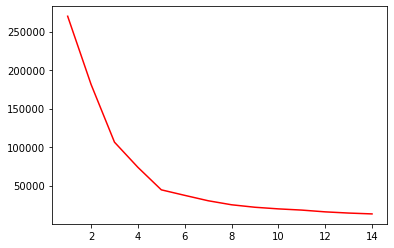

In [17]:
# Lets ELBow method to select best number of cluster
Wcss = []
for i in range(1,15):
    kmean = KMeans(n_clusters=i,init='k-means++').fit(x)
    Wcss.append(kmean.inertia_)
plt.plot(range(1,15),Wcss,color='red')

In [18]:
# as per elbow method I have decide to use k=5

kmean_model = KMeans(n_clusters=5,init='k-means++').fit(x)
kmean_model.labels_


array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [19]:
y_kmeans = kmean_model.fit_predict(x)
kmeans_df = pd.DataFrame(y_kmeans,columns=['Cluster'])
kmeans_df.head()


,Cluster
0,3
1,4
2,3
3,4
4,3


In [20]:
# append the cluster value
combined = pd.concat([df,kmeans_df],axis=1)

# Export the dataset
combined.to_csv('Mall_Customer_clustered.csv')

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        4  
2        3  
3        4  
4        3  


In [61]:
combined.loc[combined.Cluster==4].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,4
3,4,Female,23,16,77,4
5,6,Female,22,17,76,4
7,8,Female,23,18,94,4
9,10,Female,30,19,72,4


### Visualiztion for presentation

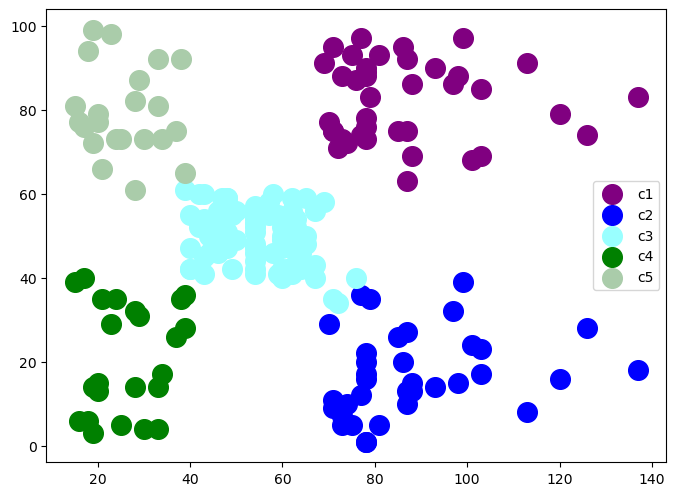

In [167]:
plt.figure(figsize=(8,6),dpi=100)

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=200,c='purple',label='c1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=200,c='blue',label='c2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=200,c='#9ff',label='c3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=200,c='green',label='c4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=200,c='#aca',label='c5')
plt.legend(['c1','c2','c3','c4','c5']);


* C1 group customres who earn and spend more, They are ideal customers.
* C2 group customers who earn more but spend less.
* C3 group customres are the average shoppers. 
* C4 group customers are basic customers.
* C5 group customers are the shopping binge.

## Hierarchical cluster

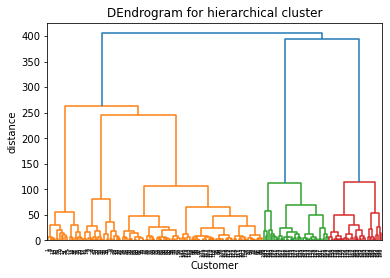

In [137]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('DEndrogram for hierarchical cluster')
plt.xlabel('Customer')
plt.ylabel('distance')
plt.show()

In [140]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X=x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [142]:
# append the result to existinng dataset
combined_hc = pd.concat([df,pd.DataFrame(y_hc,columns=['Group'])],axis=1)

# export the result
combined_hc.to_csv('Mall_group.csv')

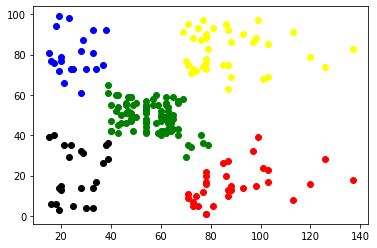

In [146]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],c='red')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],c='green')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],c='yellow')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],c='blue')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],c='black')
plt.show()

